In [15]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Data
Split given training data into the following split:
- 60% Training set
- 20% Cross Validation Set
- 10% Test Set

In [10]:
df_all = pd.read_excel('train.xlsx')
df = df_all.drop(columns = ['Name', 'Cabin', 'Ticket'])

# one hot encoding for all categorical values
cat_variables = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
df = pd.get_dummies(data= df, prefix=cat_variables, columns=cat_variables)

# get all columns that will be used as features, rmove target column to prepare for splitting
features = [ x for x in df.columns if x not in 'Survived']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df['Survived'], 
                                                    train_size=0.8, random_state=42)
display(X_train)
display(X_test)
display(y_train)
display(y_test)

,PassengerId,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
331,726,20.0,8.6625,False,False,True,False,True,True,False,...,True,False,False,False,False,False,False,False,False,True
733,146,19.0,36.7500,False,True,False,False,True,False,True,...,False,True,False,False,False,False,False,False,False,True
382,869,NaN,9.5000,False,False,True,False,True,True,False,...,True,False,False,False,False,False,False,False,False,True
704,154,40.5,14.5000,False,False,True,False,True,True,False,...,False,False,True,False,False,False,False,False,False,True
813,121,21.0,73.5000,False,True,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,371,25.0,55.4417,True,False,False,False,True,False,True,...,True,False,False,False,False,False,False,True,False,False
270,855,44.0,26.0000,False,True,False,True,False,False,True,...,True,False,False,False,False,False,False,False,False,True
860,434,17.0,7.1250,False,False,True,False,True,True,False,...,True,False,False,False,False,False,False,False,False,True
435,191,32.0,13.0000,False,True,False,True,False,True,False,...,True,False,False,False,False,False,False,False,False,True


,PassengerId,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
709,272,25.0,0.0000,False,False,True,False,True,True,False,...,True,False,False,False,False,False,False,False,False,True
439,643,2.0,27.9000,False,False,True,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
840,364,35.0,7.0500,False,False,True,False,True,True,False,...,True,False,False,False,False,False,False,False,False,True
720,708,42.0,26.2875,True,False,False,False,True,True,False,...,True,False,False,False,False,False,False,False,False,True
39,763,20.0,7.2292,False,False,True,False,True,True,False,...,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,64,4.0,27.9000,False,False,True,False,True,False,False,...,False,False,True,False,False,False,False,False,False,True
773,119,24.0,247.5208,True,False,False,False,True,True,False,...,False,True,False,False,False,False,False,True,False,False
25,382,1.0,15.7417,False,False,True,True,False,True,False,...,False,False,True,False,False,False,False,True,False,False
84,249,37.0,52.5542,True,False,False,False,True,False,True,...,False,True,False,False,False,False,False,False,False,True


331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

# HyperParamete Tuning
Will be investigating the parameters:
- minimum samples split (min number of samples required to split node)
- max depth


In [34]:
min_samples_split_list = [2, 5, 8, 10, 20, 30, 40, 60, 80, 100, 120, 200, 300]
max_depth_list = [2, 3, 4, 5, 7, 8, 10, 12, 16, 32, 64, None]

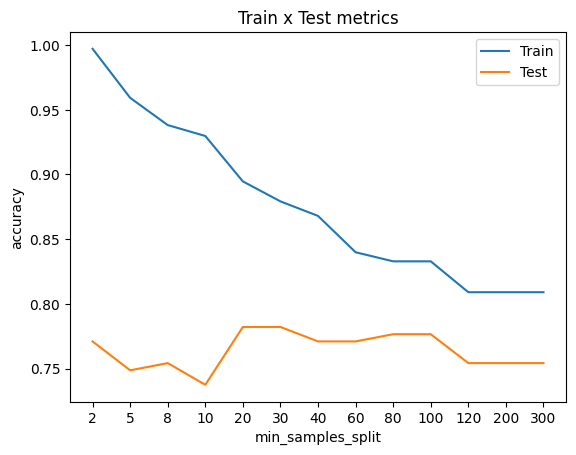

In [35]:
accuracy_list_train = []
accuracy_list_test = []

for min_samples_split in min_samples_split_list:
    model = DecisionTreeClassifier(min_samples_split = min_samples_split,
                                   random_state=42).fit(X_train, y_train)
    prediction_train = model.predict(X_train)
    prediction_test = model.predict(X_test)
    accuracy_train = accuracy_score(prediction_train, y_train)
    accuracy_test = accuracy_score(prediction_test, y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Test metrics')
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.xticks(ticks = range(len(min_samples_split_list)), labels = min_samples_split_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train','Test'])


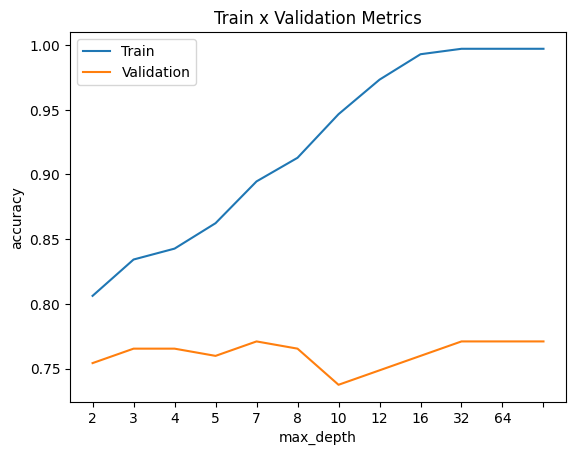

In [31]:
accuracy_list_train = []
accuracy_list_test = []

for max_depth in max_depth_list:
    model = DecisionTreeClassifier(max_depth=max_depth,
                                   random_state=42).fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)
    accuracy_train = accuracy_score(predictions_train, y_train)
    accuracy_test = accuracy_score(predictions_test, y_test)
    accuracy_list_train.append(accuracy_train)
    accuracy_list_test.append(accuracy_test)

plt.title('Train x Validation Metrics')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(ticks=range(len(max_depth_list)), labels=max_depth_list)
plt.plot(accuracy_list_train)
plt.plot(accuracy_list_test)
plt.legend(['Train', 'Validation'])


According to the data, the best choice for the hyperparameters are:
- min_samples_split = 100
- max_depth = 7